In [1]:
import sys, os
sys.path.append(os.path.abspath('../'))
from src.data_processing import load_data, clean_data, map_ip_to_country, engineer_features
from src.model_utils import prepare_for_modeling, handle_imbalance_smote
import seaborn as sns
import matplotlib.pyplot as plt

# 1. LOAD & CLEAN (Visible Cleaning)
fraud = clean_data(load_data('../data/raw/Fraud_Data.csv'))
ip = load_data('../data/raw/IpAddress_to_Country.csv')

# 2. GEOLOCATION & FEATURES
df = map_ip_to_country(fraud, ip)
df = engineer_features(df)

# Explicit Check (Visibility requested by tutor)
print(f"Dataset shape: {df.shape}")
print(f"Duplicates found: {df.duplicated().sum()}")
print(df.info())

Dataset shape: (151112, 18)
Duplicates found: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   user_id                 151112 non-null  int64         
 1   signup_time             151112 non-null  datetime64[ns]
 2   purchase_time           151112 non-null  datetime64[ns]
 3   purchase_value          151112 non-null  int64         
 4   device_id               151112 non-null  object        
 5   source                  151112 non-null  object        
 6   browser                 151112 non-null  object        
 7   sex                     151112 non-null  object        
 8   age                     151112 non-null  int64         
 9   ip_address              151112 non-null  float64       
 10  class                   151112 non-null  int64         
 11  lower_bound_ip_address  150478 non-null  fl

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


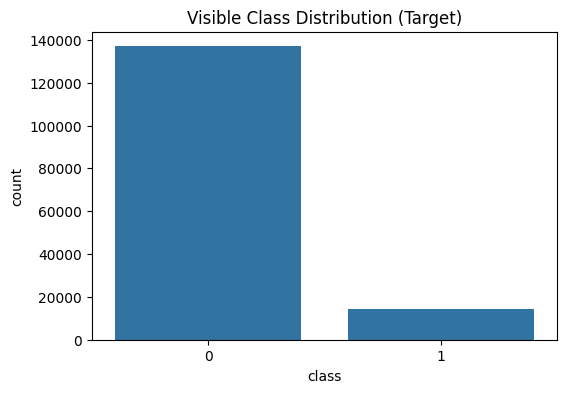

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


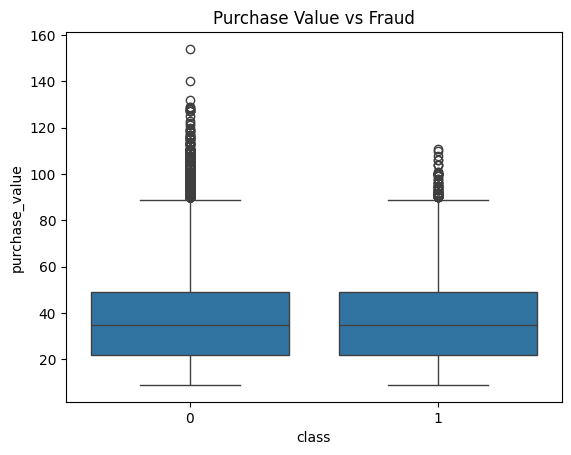

In [2]:
# Univariate Plot
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df)
plt.title('Visible Class Distribution (Target)')
plt.show()

# Bivariate Plot
sns.boxplot(x='class', y='purchase_value', data=df)
plt.title('Purchase Value vs Fraud')
plt.show()

In [3]:
# Prepare and SMOTE
X_train, X_test, y_train, y_test = prepare_for_modeling(df, 'class')
X_res, y_res = handle_imbalance_smote(X_train, y_train)

# Visible validation of counts
print("Post-SMOTE Class Counts:", y_res.value_counts().to_dict())

INFO:root:Before SMOTE: {0: 109568, 1: 11321}
INFO:root:After SMOTE: {0: 109568, 1: 109568}


Post-SMOTE Class Counts: {0: 109568, 1: 109568}
